#Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## EDA Level 0 - Pure understanding of the data

For this level, I want to understand the data better by looking at the column datatype, null counts, distinct values, and top 10 values.

In [2]:
survey_data_path = './data/survey_data.csv'
survey_users_app_usage_path = './data/survey_users_app_usage.csv'

survey_data = pd.read_csv(survey_data_path)
survey_users_app_usage = pd.read_csv(survey_users_app_usage_path)

In [3]:
survey_data.head()

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I like to learn new languages,"I want to learn as many languages as I can,Oth...",Advanced,Not currently a student,1,193
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to connect with my heritage or identity,NaN,Beginner,Not currently a student,1,119
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,NaN,Intermediate,Not currently a student,1,157


In [4]:
survey_data.describe()

,survey_complete,time_spent_seconds
count,6187.000000,6187.000000
mean,0.925974,3325.057055
std,0.261835,26268.864929
min,0.000000,-297.000000
25%,1.000000,234.000000
50%,1.000000,325.000000
75%,1.000000,470.000000
max,1.000000,584939.000000


In [5]:
survey_users_app_usage.head()

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
0,35cb7e8f72c911e9888edca9049399ef,1/10/22 21:14,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137,NaN
1,35ca34fd72c911e99ed6dca9049399ef,2/28/21 5:01,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453,NaN
2,35d1a54a72c911e98e25dca9049399ef,5/7/18 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481,NaN
3,35d4beb072c911e9aa92dca9049399ef,4/27/22 9:28,NaN,2.0,False,False,2.0,3,6.0,5.0,1,30,NaN
4,35ccf4bd72c911e9be2edca9049399ef,4/9/19 3:16,NaN,34.0,False,False,216.0,57,338.0,297.0,56,1144,NaN


In [6]:
survey_users_app_usage.describe()

,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
count,2687.000000,6135.000000,5857.000000,6149.000000,5993.000000,5993.000000,6149.000000,6149.000000,0.0
mean,25.853740,27.314914,107.126515,49.150106,249.929918,233.634741,154.855586,615.571963,NaN
std,13.707093,20.179992,97.168490,39.212910,300.918632,284.536445,617.272874,594.823322,NaN
min,1.000000,-10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,NaN
25%,20.000000,10.000000,30.000000,12.000000,55.000000,49.000000,3.000000,99.000000,NaN
50%,20.000000,26.000000,81.000000,44.000000,166.000000,153.000000,17.000000,417.000000,NaN
75%,30.000000,38.000000,160.000000,85.000000,332.000000,311.000000,88.000000,1002.000000,NaN
max,50.000000,83.000000,617.000000,289.000000,4786.000000,4686.000000,6000.000000,2402.000000,NaN


In [7]:
extreme_cols_usage = ['n_lessons_started', 'n_lessons_completed', 'longest_streak']


thresholds_usage = survey_users_app_usage[extreme_cols_usage].quantile(0.99)
for col in extreme_cols_usage:
    threshold = thresholds_usage[col]
    survey_users_app_usage[col] = survey_users_app_usage[col].clip(upper=threshold)


mean_time_spent = survey_data[survey_data['time_spent_seconds'] >= 0]['time_spent_seconds'].mean()
survey_data.loc[survey_data['time_spent_seconds'] < 0, 'time_spent_seconds'] = int(mean_time_spent)


In [8]:
survey_data.describe()

,survey_complete,time_spent_seconds
count,6187.000000,6187.000000
mean,0.925974,3378.907225
std,0.261835,26265.244314
min,0.000000,2.000000
25%,1.000000,240.000000
50%,1.000000,332.000000
75%,1.000000,486.000000
max,1.000000,584939.000000


In [9]:
survey_users_app_usage.describe()

,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
count,2687.000000,6135.000000,5857.000000,6149.000000,5993.000000,5993.000000,6149.000000,6149.000000,0.0
mean,25.853740,27.314914,107.126515,49.150106,244.236042,228.657300,112.241646,615.571963,NaN
std,13.707093,20.179992,97.168490,39.212910,264.802980,252.563449,253.062038,594.823322,NaN
min,1.000000,-10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,NaN
25%,20.000000,10.000000,30.000000,12.000000,55.000000,49.000000,3.000000,99.000000,NaN
50%,20.000000,26.000000,81.000000,44.000000,166.000000,153.000000,17.000000,417.000000,NaN
75%,30.000000,38.000000,160.000000,85.000000,332.000000,311.000000,88.000000,1002.000000,NaN
max,50.000000,83.000000,617.000000,289.000000,1388.560000,1338.120000,1706.240000,2402.000000,NaN


In [10]:
def column_summary(df):
    '''
    Summarizes each column of a DataFrame, providing its data type, number of nulls, distinct values, top value counts, 
    and the percentage of null values (rounded to an integer).

    Input: 
        - df (pd.DataFrame): The input DataFrame.
        
    Output: 
        - pd.DataFrame: Summary of columns with:
            - col_name: Column name
            - col_dtype: Data type
            - num_of_nulls: Null count
            - num_of_non_nulls: Non-null count
            - num_of_distinct_values: Distinct values count
            - percentage_nulls: Percentage of null values (rounded)
            - distinct_values_counts: Value counts (all if <=10 distinct, else top 10)
    '''
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        percentage_nulls = round((num_of_nulls / len(df)) * 100)
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'percentage_nulls': percentage_nulls,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


In [11]:
survey_users_app_usage = survey_users_app_usage.drop(columns=['Unnamed: 12'])

survey_data_summary = column_summary(survey_data)
app_usage_summary = column_summary(survey_users_app_usage)
print(survey_data.shape)
survey_data_summary


(6187, 19)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,percentage_nulls,distinct_values_counts
0,user_id,object,0,6187,6150,0,"{'35d3f8b572c911e9b252dca9049399ef': 2, '35ce4..."
1,age,object,349,5838,5,6,"{'35 - 54': 2019, '18-34': 1779, '55 - 74': 15..."
2,annual_income,object,1005,5182,5,16,"{'$0 - $10,000': 1829, '$26,000 - $75,000': 14..."
3,country,object,0,6187,10,0,"{'FR': 1006, 'JP': 899, 'MX': 892, 'RU': 684, ..."
4,duolingo_platform,object,276,5911,3,4,"{'Android phone or tablet': 2594, 'iPhone or i..."
5,duolingo_subscriber,object,286,5901,4,5,"{'No, I have never paid for Duolingo Plus': 39..."
6,duolingo_usage,object,276,5911,5,4,"{'Daily': 4341, 'Weekly': 1070, 'Monthly': 292..."
7,employment_status,object,457,5730,4,7,"{'Employed full-time': 2904, 'Retired': 1043, ..."
8,future_contact,object,741,5446,2,12,"{'Yes': 4483, 'No': 963}"
9,gender,object,349,5838,4,6,"{'Female': 2927, 'Male': 2790, 'Prefer not to ..."


In [12]:
print(survey_users_app_usage.shape)
app_usage_summary

(6149, 12)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,percentage_nulls,distinct_values_counts
0,user_id,object,0,6149,6114,0,"{'35cd2cb572c911e9ae3cdca9049399ef': 2, '35d55..."
1,duolingo_start_date,object,0,6149,6126,0,"{'1/4/22 21:34': 2, '8/12/20 23:33': 2, '1/12/..."
2,daily_goal,float64,3462,2687,7,56,"{20.0: 1046, 30.0: 584, 50.0: 523, 10.0: 476, ..."
3,highest_course_progress,float64,14,6135,91,0,"{31.0: 427, 64.0: 290, 34.0: 227, 2.0: 211, 32..."
4,took_placement_test,object,14,6135,2,0,"{False: 3527, True: 2608}"
5,purchased_subscription,bool,0,6149,2,0,"{False: 4208, True: 1941}"
6,highest_crown_count,float64,292,5857,439,5,"{0.0: 83, 3.0: 69, 5.0: 67, 1.0: 60, 4.0: 58, ..."
7,n_active_days,int64,0,6149,166,0,"{95: 380, 4: 237, 1: 214, 94: 211, 3: 210, 2: ..."
8,n_lessons_started,float64,156,5993,900,3,"{1.0: 104, 1388.5599999999995: 60, 3.0: 56, 2...."
9,n_lessons_completed,float64,156,5993,888,3,"{0.0: 93, 1.0: 71, 3.0: 61, 1338.119999999999:..."


In [13]:
def check_duplicates(df):
    '''
    Checks for duplicate rows in the DataFrame.

    Input: 
        - df (pd.DataFrame): The input DataFrame.
        
    Output:
        - Prints the number of duplicate rows found.
        - Returns a DataFrame containing only the duplicate rows (if any).
    '''
    num_duplicates = df.duplicated().sum()
    
    if num_duplicates > 0:
        print(f"Number of duplicate rows: {num_duplicates}")
        return df[df.duplicated(keep=False)]
    else:
        print("No duplicate rows found.")
        return pd.DataFrame() 

In [14]:
check_duplicates(survey_data)
check_duplicates(survey_users_app_usage)

No duplicate rows found.
No duplicate rows found.


""


## EDA Level 1 — Transformation of Original Data (Survey_Data)

Columns with > 20% missing values, were imputed using simple approaches (eg. replacing them using 'Unknown')

In [15]:
survey_data['other_resources'] = survey_data['other_resources'].fillna('Unknown')
survey_data['primary_language_motivation_followup'] = survey_data['primary_language_motivation_followup'].fillna('Unknown')


Columns with moderate to low percentage (5-20%) missing values were first encoded using Label Encoding and then imputed using KNNImputer.

In [16]:
survey_data_copy = survey_data.copy()

label_encoders = {}
categorical_cols = ['age', 'country', 'duolingo_platform', 'gender', 'primary_language_commitment', 
                    'annual_income', 'future_contact', 'student', 
                    'duolingo_subscriber', 'duolingo_usage', 'employment_status', 
                    'primary_language_review', 'primary_language_motivation', 
                    'primary_language_proficiency']

for col in categorical_cols:
    le = LabelEncoder()
    
    non_null_data = survey_data_copy[col][survey_data_copy[col].notnull()]
    le.fit(non_null_data)
    
    survey_data_copy[col] = survey_data_copy[col].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
    
    label_encoders[col] = le

knn_cols = categorical_cols

knn_imputer = KNNImputer(n_neighbors=5)

survey_data_copy[knn_cols] = knn_imputer.fit_transform(survey_data_copy[knn_cols])

survey_data_copy[categorical_cols] = survey_data_copy[categorical_cols].astype(int)

# for col in categorical_cols:
#     survey_data_copy[col] = survey_data_copy[col].apply(lambda x: label_encoders[col].inverse_transform([int(x)])[0] if pd.notna(x) else np.nan)


In [17]:
survey_data_copy.isnull().sum() 

user_id                                 0
age                                     0
annual_income                           0
country                                 0
duolingo_platform                       0
duolingo_subscriber                     0
duolingo_usage                          0
employment_status                       0
future_contact                          0
gender                                  0
other_resources                         0
primary_language_commitment             0
primary_language_review                 0
primary_language_motivation             0
primary_language_motivation_followup    0
primary_language_proficiency            0
student                                 0
survey_complete                         0
time_spent_seconds                      0
dtype: int64

In [18]:
survey_data_copy.dtypes

user_id                                 object
age                                      int64
annual_income                            int64
country                                  int64
duolingo_platform                        int64
duolingo_subscriber                      int64
duolingo_usage                           int64
employment_status                        int64
future_contact                           int64
gender                                   int64
other_resources                         object
primary_language_commitment              int64
primary_language_review                  int64
primary_language_motivation              int64
primary_language_motivation_followup    object
primary_language_proficiency             int64
student                                  int64
survey_complete                          int64
time_spent_seconds                       int64
dtype: object

In [19]:
survey_data_copy.nunique()

user_id                                 6150
age                                        5
annual_income                              5
country                                   10
duolingo_platform                          3
duolingo_subscriber                        4
duolingo_usage                             5
employment_status                          4
future_contact                             2
gender                                     4
other_resources                          253
primary_language_commitment                5
primary_language_review                    2
primary_language_motivation               13
primary_language_motivation_followup     147
primary_language_proficiency               3
student                                    3
survey_complete                            2
time_spent_seconds                      1230
dtype: int64

In [20]:
survey_data_copy.head()

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,0,3,5,0,1,0,0,1,1,"Stories/novels/children's books,Movies/TV Shows",4,1,3,"I want to learn as many languages as I can,Oth...",0,1,1,193
1,35c9fdde72c911e98630dca9049399ef,0,3,5,2,1,4,0,1,1,Unknown,3,1,4,"I am an immigrant,I am a refugee",2,1,1,139
2,35c9feb072c911e9ab4cdca9049399ef,0,4,5,2,3,0,0,1,1,Unknown,1,1,9,Unknown,1,1,1,119
3,35c9ff7072c911e9900ddca9049399ef,0,4,5,2,2,0,0,1,0,Other apps,4,0,1,I want to learn some basics in the local langu...,2,1,1,229
4,35ca002672c911e99effdca9049399ef,1,4,5,0,3,0,0,1,1,Unknown,4,0,9,Unknown,2,1,1,157


## EDA Level 1 — Transformation of Original Data (Survey_Users_App_Usage)

Columns with > 50% missing values were imputed using simple approaches (eg. replacing them using '0')

In [21]:
survey_users_app_usage['daily_goal'] = survey_users_app_usage['daily_goal'].fillna(0).astype(float)

For categorical columns, use KNN Imputation.

In [22]:
survey_users_app_usage = survey_users_app_usage.copy()
survey_users_app_usage['took_placement_test'] = survey_users_app_usage['took_placement_test'].astype(float)
knn_imputer = KNNImputer(n_neighbors=5)
survey_users_app_usage[['took_placement_test']] = knn_imputer.fit_transform(survey_users_app_usage[['took_placement_test']])
survey_users_app_usage['took_placement_test'] = survey_users_app_usage['took_placement_test'].round().astype(bool)

For numeric columns, we will apply Iterative Imputation. Instead of categorizing users into predefined groups like abandoned or active users, we are adopting a "bottom-up" approach for user segmentation. This method leverages unsupervised learning techniques to uncover unexpected patterns in the data. By doing so, we aim to reduce confirmation bias and gain new insights that extend beyond our existing assumptions about what drives our business.

In [23]:
num_columns = ['highest_course_progress', 'n_lessons_started', 'n_lessons_completed', 'highest_crown_count']
iterative_imputer = IterativeImputer(max_iter=80, random_state=0)
survey_users_app_usage[num_columns] = iterative_imputer.fit_transform(survey_users_app_usage[num_columns])


In [24]:
survey_users_app_usage['highest_crown_count'] = survey_users_app_usage['highest_crown_count'].clip(lower=0)
survey_users_app_usage['highest_crown_count'] = survey_users_app_usage['highest_crown_count'].astype(int)
survey_users_app_usage['highest_course_progress'] = survey_users_app_usage['highest_course_progress'].clip(lower=0)
survey_users_app_usage['highest_course_progress'] = survey_users_app_usage['highest_course_progress'].astype(int)
survey_users_app_usage['n_lessons_started'] = survey_users_app_usage['n_lessons_started'].clip(lower=0)
survey_users_app_usage['n_lessons_started'] = survey_users_app_usage['n_lessons_started'].astype(int)
survey_users_app_usage['n_lessons_completed'] = survey_users_app_usage['n_lessons_completed'].clip(lower=0)
survey_users_app_usage['n_lessons_completed'] = survey_users_app_usage['n_lessons_completed'].astype(int)

In [25]:
survey_users_app_usage.isnull().sum() 

user_id                    0
duolingo_start_date        0
daily_goal                 0
highest_course_progress    0
took_placement_test        0
purchased_subscription     0
highest_crown_count        0
n_active_days              0
n_lessons_started          0
n_lessons_completed        0
longest_streak             0
n_days_on_platform         0
dtype: int64

In [26]:
survey_users_app_usage.nunique()

user_id                    6114
duolingo_start_date        6126
daily_goal                    8
highest_course_progress      83
took_placement_test           2
purchased_subscription        2
highest_crown_count         439
n_active_days               166
n_lessons_started           899
n_lessons_completed         888
longest_streak              691
n_days_on_platform         1751
dtype: int64

In [27]:
survey_users_app_usage.head()

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,1/10/22 21:14,0.0,46,True,False,277,88,741,668,135.0,137
1,35ca34fd72c911e99ed6dca9049399ef,2/28/21 5:01,0.0,50,True,False,62,16,57,57,6.0,453
2,35d1a54a72c911e98e25dca9049399ef,5/7/18 17:55,1.0,71,False,False,202,29,315,295,55.0,1481
3,35d4beb072c911e9aa92dca9049399ef,4/27/22 9:28,0.0,2,False,False,2,3,6,5,1.0,30
4,35ccf4bd72c911e9be2edca9049399ef,4/9/19 3:16,0.0,34,False,False,216,57,338,297,56.0,1144


## EDA Level 2 — Understanding of Transformed Data

In [28]:
survey_users_app_usage.describe()

,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
count,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000
mean,11.297609,27.399902,106.186372,49.150106,242.159863,226.660433,112.241646,615.571963
std,15.702263,20.023220,95.976314,39.212910,261.877092,249.799117,253.062038,594.823322
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,10.000000,30.000000,12.000000,58.000000,51.000000,3.000000,99.000000
50%,0.000000,26.000000,81.000000,44.000000,165.000000,151.000000,17.000000,417.000000
75%,20.000000,38.000000,158.000000,85.000000,327.000000,305.000000,88.000000,1002.000000
max,50.000000,83.000000,617.000000,289.000000,1388.000000,1338.000000,1706.240000,2402.000000


In [29]:
survey_data.describe()

,survey_complete,time_spent_seconds
count,6187.000000,6187.000000
mean,0.925974,3378.907225
std,0.261835,26265.244314
min,0.000000,2.000000
25%,1.000000,240.000000
50%,1.000000,332.000000
75%,1.000000,486.000000
max,1.000000,584939.000000


In [30]:
merged_data = pd.merge(survey_data_copy, survey_users_app_usage, on='user_id')
numeric_cols = merged_data.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
correlation_matrix

,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,primary_language_commitment,...,survey_complete,time_spent_seconds,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
age,1.000000,-0.026782,-0.026916,0.080851,0.069845,-0.049071,0.334218,-0.014028,0.004392,0.046133,...,0.082289,0.012872,-0.012180,0.008106,0.063256,0.077389,0.093912,0.091053,0.039647,-0.068821
annual_income,-0.026782,1.000000,0.037367,0.139085,0.328534,-0.164994,-0.393878,0.089086,0.123973,0.050226,...,0.088586,-0.019911,0.115001,0.134406,0.165443,0.198505,0.130902,0.131918,0.123024,0.108553
country,-0.026916,0.037367,1.000000,0.092527,0.128285,0.020032,0.010951,0.070768,-0.019267,-0.009602,...,-0.014527,0.010619,0.079379,0.050121,0.008799,0.006969,0.027590,0.025294,0.021863,0.080405
duolingo_platform,0.080851,0.139085,0.092527,1.000000,0.146730,0.000905,0.019390,-0.019591,-0.072705,-0.012065,...,0.041411,-0.003384,0.621973,0.011891,-0.041575,0.022136,0.028214,0.014105,0.009249,0.014232
duolingo_subscriber,0.069845,0.328534,0.128285,0.146730,1.000000,-0.303499,-0.128755,0.163124,0.085483,0.030318,...,0.108240,-0.012527,0.207549,0.198017,0.294149,0.354486,0.336954,0.333933,0.189779,0.106621
duolingo_usage,-0.049071,-0.164994,0.020032,0.000905,-0.303499,1.000000,0.059636,-0.059873,-0.024491,-0.071296,...,0.006455,0.009309,-0.045546,-0.140321,-0.283633,-0.433129,-0.346215,-0.346747,-0.184478,0.027101
employment_status,0.334218,-0.393878,0.010951,0.019390,-0.128755,0.059636,1.000000,-0.019000,-0.082236,-0.003929,...,0.068786,0.022795,-0.024792,-0.036995,-0.053136,-0.065252,-0.012496,-0.013339,-0.056019,-0.076258
future_contact,-0.014028,0.089086,0.070768,-0.019591,0.163124,-0.059873,-0.019000,1.000000,0.032879,-0.001333,...,0.297838,-0.027000,0.017308,0.106219,0.111374,0.103061,0.111545,0.115767,0.066667,0.098207
gender,0.004392,0.123973,-0.019267,-0.072705,0.085483,-0.024491,-0.082236,0.032879,1.000000,0.012610,...,0.108979,-0.012731,-0.045883,0.043681,0.053623,0.045513,0.007498,0.007400,0.051982,0.068961
primary_language_commitment,0.046133,0.050226,-0.009602,-0.012065,0.030318,-0.071296,-0.003929,-0.001333,0.012610,1.000000,...,0.003357,-0.006819,-0.021363,0.002210,0.022797,0.058683,0.023114,0.021855,-0.017270,-0.014891


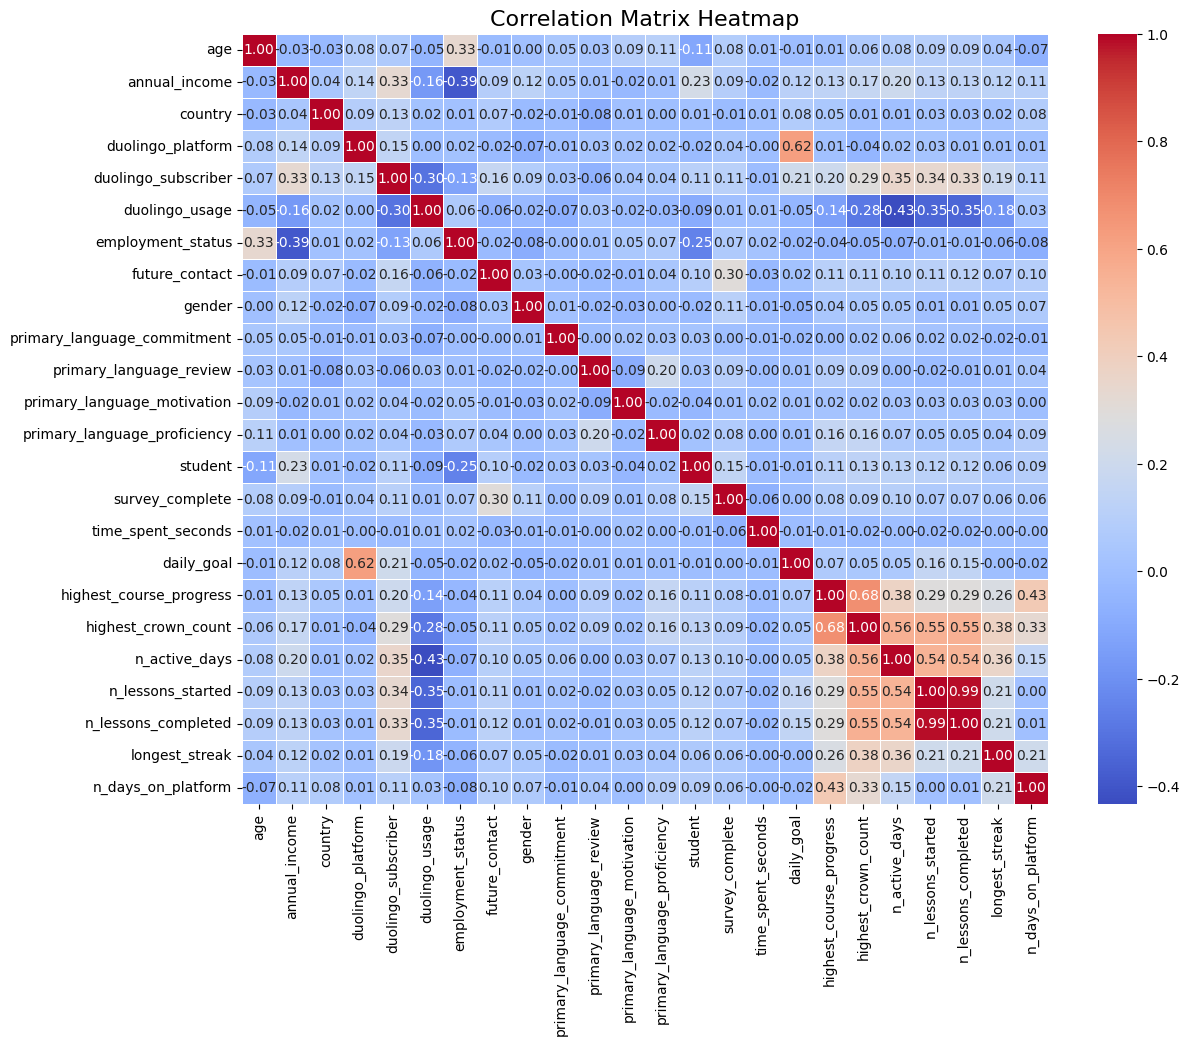

In [31]:
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

## Identify User Segments/Personas

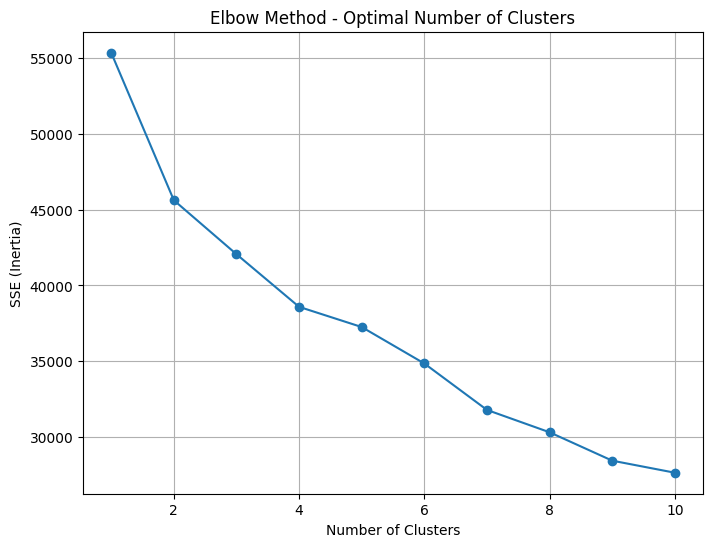

In [32]:
selected_features = ['n_active_days', 'n_lessons_completed', 'longest_streak',
                       'daily_goal', 'duolingo_subscriber', 'age', 'annual_income',
                       'primary_language_commitment', 'primary_language_motivation']

data = merged_data[selected_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

sse = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


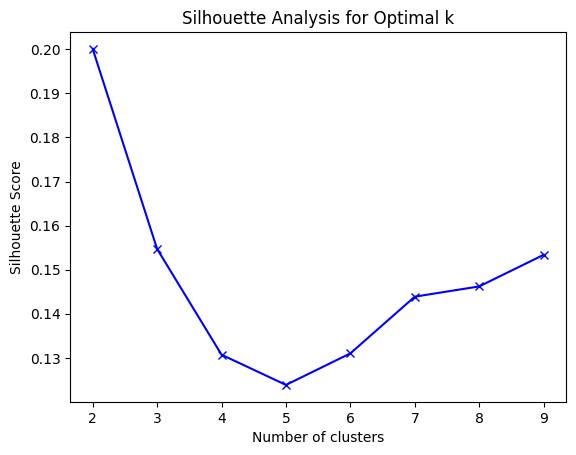

In [33]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=60)
    clusters = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


In [34]:
silhouette_scores = {}

for k in [2, 4, 7]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores[k] = score

for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')

Silhouette Score for k=2: 0.2001
Silhouette Score for k=4: 0.1307
Silhouette Score for k=7: 0.1518


In [35]:
k = 2
kmeans_2 = KMeans(n_clusters=k, random_state=42)
clusters_2 = kmeans_2.fit_predict(scaled_data)


cluster_sizes_2 = pd.Series(clusters_2).value_counts().sort_index()
print(f'Cluster sizes for k={k}:\n{cluster_sizes_2}\n')


k = 4
kmeans_4 = KMeans(n_clusters=k, random_state=42)
clusters_4 = kmeans_4.fit_predict(scaled_data)


cluster_sizes_4 = pd.Series(clusters_4).value_counts().sort_index()
print(f'Cluster sizes for k={k}:\n{cluster_sizes_4}')

k = 7
kmeans_7 = KMeans(n_clusters=k, random_state=42)
clusters_7 = kmeans_7.fit_predict(scaled_data)

cluster_sizes_7 = pd.Series(clusters_7).value_counts().sort_index()
print(f'Cluster sizes for k={k}:\n{cluster_sizes_7}')

Cluster sizes for k=2:
0    3786
1    2365
Name: count, dtype: int64

Cluster sizes for k=4:
0    2043
1    2100
2     308
3    1700
Name: count, dtype: int64
Cluster sizes for k=7:
0    1067
1    1561
2    1049
3     848
4     640
5     242
6     744
Name: count, dtype: int64


Summary:

After evaluating the silhouette scores, cluster sizes, and the interpretability and actionability of the clusters, the following conclusions can be drawn:

- **k = 2**: This configuration provides well-separated clusters; however, the segmentation is too broad and may lack actionable insights.

- **k = 4**: This choice strikes a good balance between cluster separation, interpretability, and cluster size balance. Although the silhouette score is lower than that of \( k = 2 \), the segmentation into four distinct groups appears more useful for generating actionable personas.

- **k = 7**: This option introduces over-segmentation, resulting in two small clusters and a further drop in the silhouette score, making it less appealing compared to \( k = 4 \).

In [36]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data = data.copy()  

data['cluster'] = clusters

cluster_analysis = data.groupby('cluster').mean()

cluster_analysis

,n_active_days,n_lessons_completed,longest_streak,daily_goal,duolingo_subscriber,age,annual_income,primary_language_commitment,primary_language_motivation
cluster,,,,,,,,,
0,35.621145,141.347528,33.434165,7.830641,1.024474,1.421929,1.015663,2.284386,9.922173
1,32.345238,131.226667,31.791905,9.079048,1.078095,0.733810,1.318571,2.145714,3.060952
2,82.798701,312.194805,1024.658701,10.019481,1.759740,1.207792,1.961039,2.071429,6.961039
3,79.912353,431.188824,140.931765,18.315882,2.624118,1.323529,2.381176,2.438824,6.889412


Cluster Distribution Bar Plot

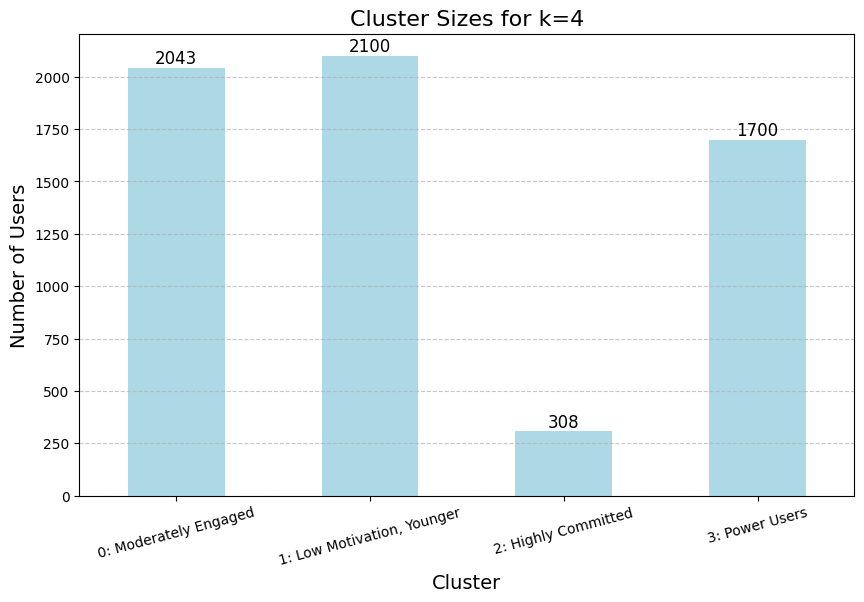

In [37]:
cluster_sizes_4 = pd.Series(clusters_4).value_counts().sort_index()

cluster_names = {
    0: '0: Moderately Engaged',
    1: '1: Low Motivation, Younger',
    2: '2: Highly Committed',
    3: '3: Power Users'
}

plt.figure(figsize=(10, 6))
bars = cluster_sizes_4.plot(kind='bar', color='lightblue')
plt.title('Cluster Sizes for k=4', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(ticks=range(len(cluster_sizes_4)), labels=[cluster_names[i] for i in cluster_sizes_4.index], rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.annotate(f'{int(bar.get_height())}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', fontsize=12)

plt.show()

Comparison of Key Engagement Metrics Across Clusters

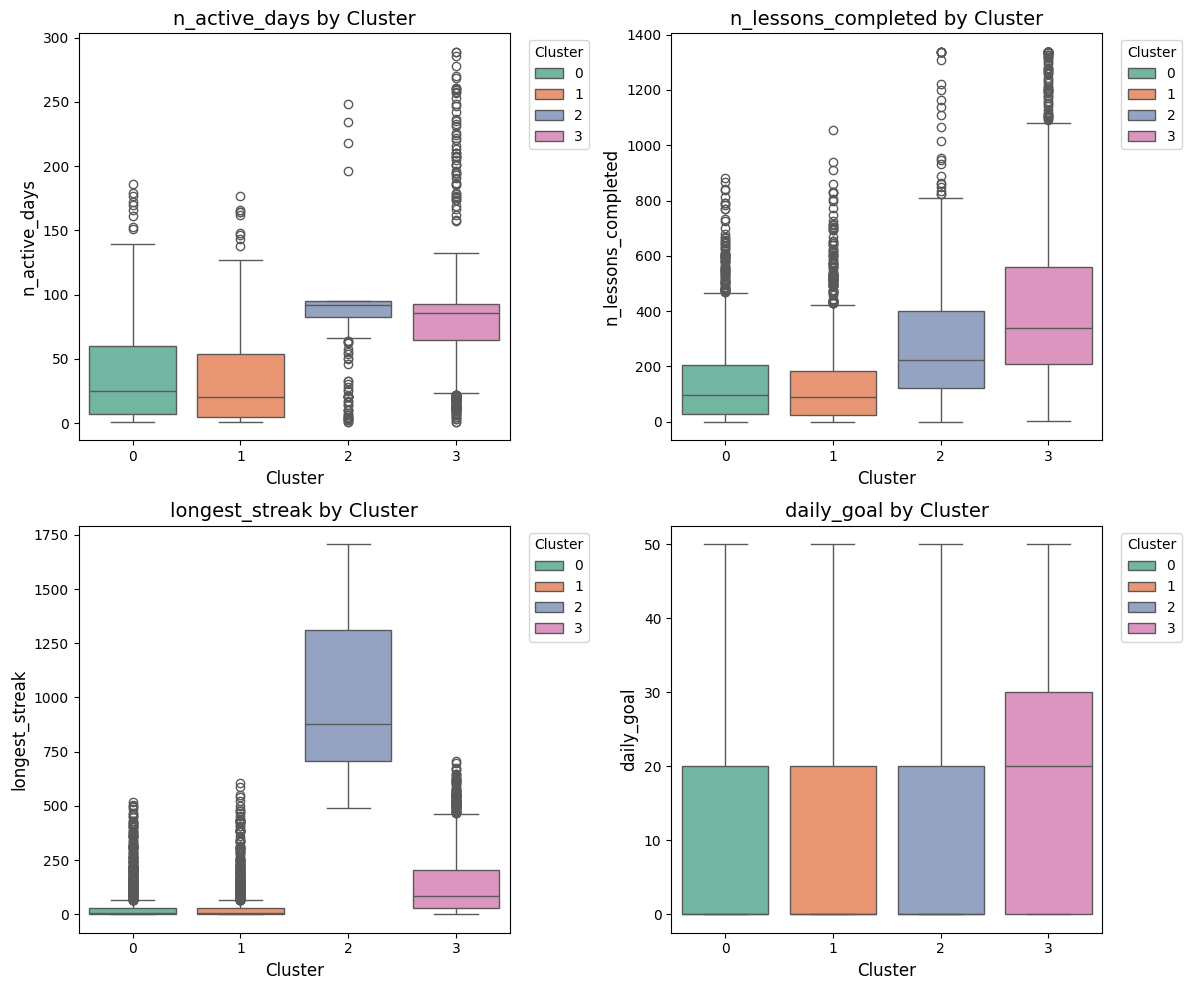

In [38]:
key_metrics = ['n_active_days', 'n_lessons_completed', 'longest_streak', 'daily_goal']


plt.figure(figsize=(12, 10))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(2,2,i)  
    sns.boxplot(x='cluster', y=metric, data=data, hue='cluster', palette='Set2')
    plt.title(f'{metric} by Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

Heatmap of Feature Importance for Personas

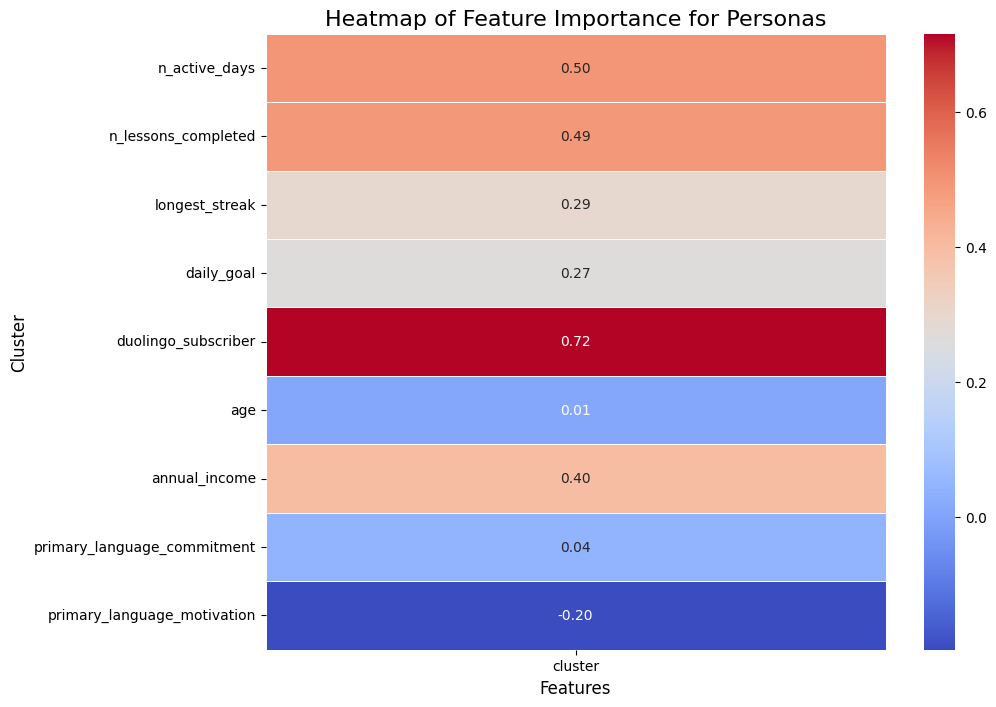

In [39]:
correlation_matrix = data.corr()
cluster_correlation = correlation_matrix[['cluster']].drop('cluster')


plt.figure(figsize=(10, 8))

sns.heatmap(cluster_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Importance for Personas', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.show()

Scatter Plot of User Engagement

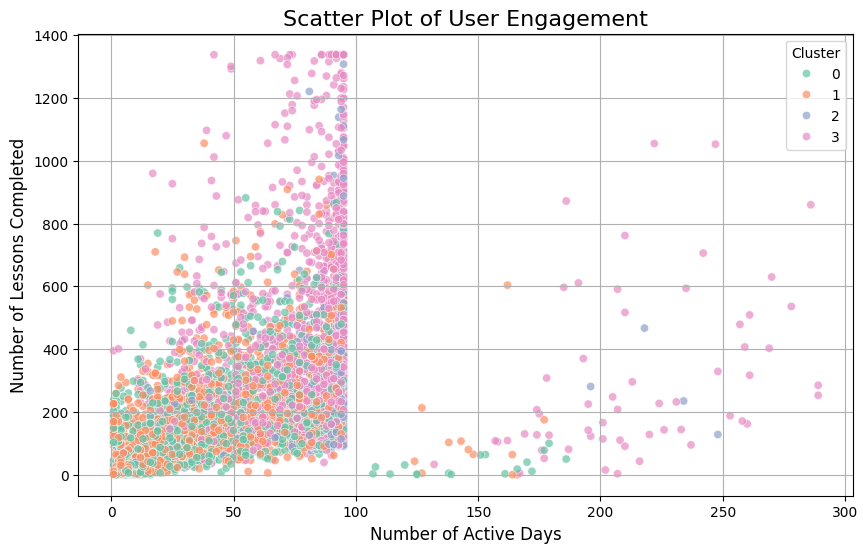

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_active_days', y='n_lessons_completed', hue='cluster', data=data, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of User Engagement', fontsize=16)
plt.xlabel('Number of Active Days', fontsize=12)
plt.ylabel('Number of Lessons Completed', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True)
plt.show()

Stacked Bar Plot of Motivation by Cluster

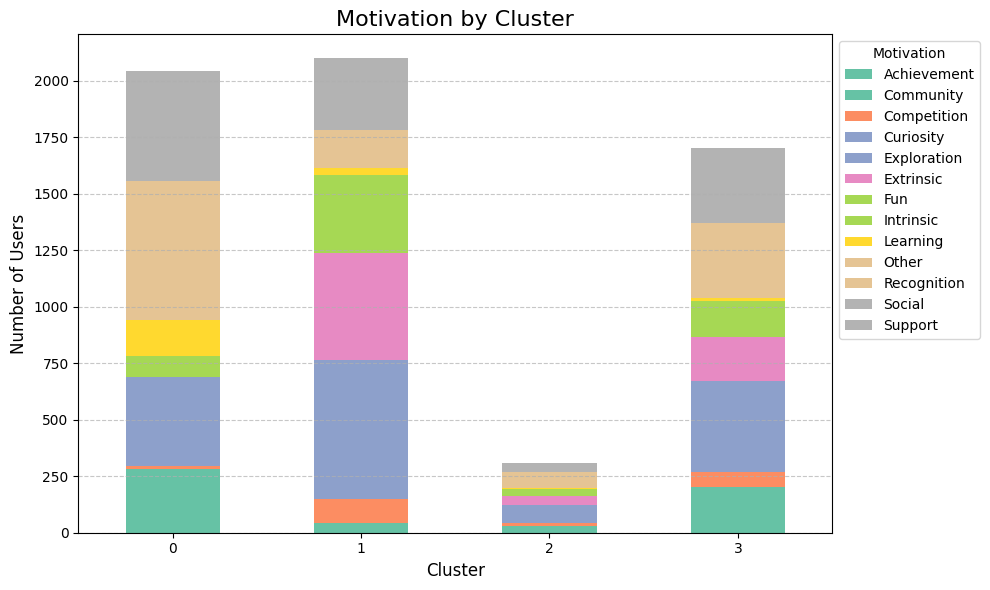

In [41]:
motivation_mapping = {
    0: 'Intrinsic',
    1: 'Extrinsic',
    2: 'Achievement',
    3: 'Social',
    4: 'Curiosity',
    5: 'Competition',
    6: 'Recognition',
    7: 'Fun',
    8: 'Learning',
    9: 'Exploration',
    10: 'Community',
    11: 'Support',
    12: 'Other'
}
data['primary_language_motivation'] = data['primary_language_motivation'].map(motivation_mapping)
motivation_counts = data.groupby(['cluster', 'primary_language_motivation']).size().unstack(fill_value=0)
motivation_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Motivation by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.xticks(rotation=0)  
plt.ylabel('Number of Users', fontsize=12)
plt.legend(title='Motivation', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()